In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


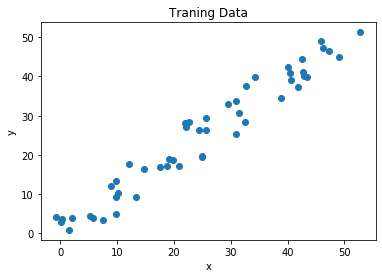

In [12]:
np.random.seed(100)
tf.set_random_seed(100)

# Generating random linear data
x = np.linspace(0,50,50)
y = np.linspace(0,50,50)

# Adding noise to the random linear data
x += np.random.uniform(-4,4,50)
y += np.random.uniform(-4,4,50)

n = len(x)

# Plot of Training Data
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Traning Data")
plt.show()

In [15]:
# Input
X = tf.placeholder("float")
Y = tf.placeholder("float")
# Traning varibles
W = tf.Variable(np.random.randn(),name = "W")
b = tf.Variable(np.random.randn(),name = "b")

learning_rate = 0.01
training_epochs = 1000

# Hypothesis
y_pred = tf.add(tf.multiply(W,X),b)

# Mean Squared Error Cost Function
cost = tf.reduce_sum(tf.pow(y_pred - Y,2)) / (2*n)

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Global Variables Initializer
init = tf.global_variables_initializer()

In [17]:
with tf.Session() as sess:
    # Initializing the Variables
    sess.run(init)
    
    # Iterating through all the epochs
    for epoch in range(training_epochs):
        
        # Feeding each data point into the optimizer using Feed Dic
        for (_x, _y) in zip(x,y):
            sess.run(optimizer, feed_dict = {X: _x, Y: _y})
        
        # Displaying the result 
        if (epoch+1)%50 == 0:
            c = sess.run(cost, feed_dict = {X: x, Y: y})
            print("Epoch",(epoch+1),"cost =",c,"W =", sess.run(W),"b =",sess.run(b))
            
        # Storing necessary values to be used outside the Session
        training_cost = sess.run(cost, feed_dict = {X: x, Y: y})
        weight = sess.run(W)
        bias = sess.run(b)
            
# Calculating the predictions
predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 

Epoch 50 cost = 5.606682 W = 0.9604235 b = 1.1157273
Epoch 100 cost = 5.6063323 W = 0.9590781 b = 1.1828089
Epoch 150 cost = 5.6073303 W = 0.9578806 b = 1.2425096
Epoch 200 cost = 5.609255 W = 0.9568148 b = 1.2956469
Epoch 250 cost = 5.6117883 W = 0.9558662 b = 1.3429425
Epoch 300 cost = 5.614694 W = 0.95502204 b = 1.3850307
Epoch 350 cost = 5.6177926 W = 0.9542708 b = 1.4224906
Epoch 400 cost = 5.6209598 W = 0.9536021 b = 1.4558318
Epoch 450 cost = 5.6241016 W = 0.9530068 b = 1.4855074
Epoch 500 cost = 5.627155 W = 0.9524771 b = 1.5119181
Epoch 550 cost = 5.6300745 W = 0.9520056 b = 1.5354245
Epoch 600 cost = 5.6328325 W = 0.9515861 b = 1.5563412
Epoch 650 cost = 5.6354175 W = 0.9512125 b = 1.5749663
Epoch 700 cost = 5.6378164 W = 0.9508801 b = 1.5915408
Epoch 750 cost = 5.6400323 W = 0.95058423 b = 1.6062925
Epoch 800 cost = 5.642066 W = 0.95032096 b = 1.619417
Epoch 850 cost = 5.643928 W = 0.9500866 b = 1.6311008
Epoch 900 cost = 5.645624 W = 0.9498781 b = 1.6414986
Epoch 950 cost =

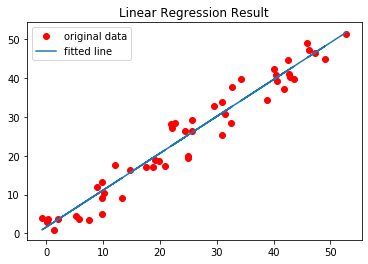

In [18]:
# Plotting the Results
plt.plot(x,y,'ro',label = "original data")
plt.plot(x,predictions,label = "fitted line")
plt.title("Linear Regression Result")
plt.legend()
plt.show()